<a href="https://colab.research.google.com/github/Urstruelycharan/GUVI-DeepLearning/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd


$S_{w,b}(x)=\frac{1}{1+e^{(wx+b)}}$

In [0]:
def sigmoid(w,x,b):
  return (1/(1+np.exp(-(w*x+b))))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

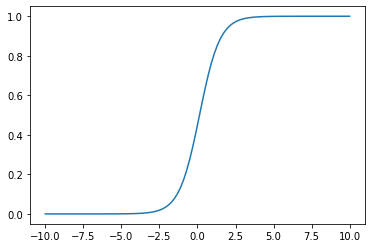

In [4]:
w=1.5 #@param {type : "slider", min : -2,max : 2 , step : 0.1 }
b=-0.2 #@param {type : "slider", min : -2,max : 2 , step : 0.1 }
x=np.linspace(-10,10,100)
y=sigmoid(w,x,b)
plt.plot(x,y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^(-(w_1x_1+w_2x_2+b))}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
from mpl_toolkits import mplot3d

In [7]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
xx1,xx2=np.meshgrid(x1,x2)
print(xx1)

[[-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 ...
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]]


In [0]:
w1=0.5

w2=2
b=0
y=sigmoid_2d(xx1,xx2,w1,w2,b)

In [9]:
plt.contourf(xx1,xx2,y,my_cmap)
plt.show()

NameError: ignored

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(50,180)


#Compute Loss for given Dataset

In [0]:
w_unknown=0.5
b_unknown=0.25
x=np.random.random(25)*20-10
y=sigmoid(x,w_unknown,b_unknown)

In [0]:
plt.plot(x,y,'*')
plt.show()

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
def compute_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(w_est,x,b_est))**2
  return loss

In [0]:
W=np.linspace(-1,1,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)

In [13]:
for i in range(WW.shape[0]):
  for j in range(BB.shape[1]):
    Loss[i,j]=compute_loss(x,y,WW[i,j],BB[i,j])

ValueError: ignored

In [0]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [14]:
print(i,j)

0 0


In [15]:
print(WW[i,j],BB[i,j])

-1.0 -1.0


#Class for Sigmoid_Neuron

In [0]:
class sigmoidneuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(self.w,x)+self.b
  def sigmoid(self,x):
    return 1.0/1.0+np.exp(-x)
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  def fit(self,X,Y,epochs=1,learning_rate=1,intialize=True):
    if intialize == True:
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    dw=0
    db=0
    for x,y in zip(X,Y):
      dw+=self.grad_w(x,y)
      db+=self.grad_b(x,y)
    self.w-=learning_rate*dw
    self.b-=learning_rate*db    
  

#Fit for Toy Data

In [0]:
X=np.array([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y=[1,1,1,0,0,0]

In [0]:
sn=sigmoidneuron()
sn.fit(X,Y,1,0.25,True)

In [0]:
def plot_sn(X,Y,sn):
  x1=np.linspace(-10,10,100)
  x2=np.linspace(-10,10,100)
  xx1,xx2=np.meshgrid(x1,x2)
  yy=np.zeros(xx1.shape)
  for i in range(x2.size):
    for j in range(x1.size):
      val=np.array([x1[j],x2[i]])
      yy[i,j]=sn.sigmoid(sn.perceptron(val))
  plt.contourf(xx1,xx2,yy,alpha=0.6)
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.plot()

[[23904.588023   52078.42005169]] [13212.46882033]
[[ 2.23432631e+09 -5.08260061e+08]] [5.64759633e+08]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


[[2949.24336443 1018.92234371]] [950.00613507]
[[  559698.69462987 -2237789.62253987]] [559498.05067744]
[[1.93693474 2.6893933 ]] [0.60226047]
[[1771.69376981 5553.96663229]] [1238.78563613]
[[1.44409893e+09 7.10338872e+09]] [1.42458582e+09]
[[449882.47926991 -98547.21489027]] [114191.38673497]
[[ 2.48873498e+11 -9.95493865e+11]] [2.48873473e+11]
[[11392381.53421078 45330723.45621835]] [9461464.61401267]


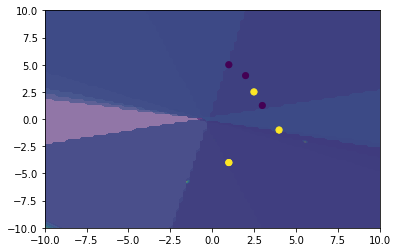

In [26]:
for i in range(10):
  print(sn.w,sn.b)
  plot_sn(X,Y,sn)
  sn.fit(X,Y,1,0.25,True)
  
